<a href="https://colab.research.google.com/github/Adrianus-Bagas/Hate-Speech-Detection/blob/main/Hate_Speech_Detection_(Model).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deteksi Ujaran Kebencian Menggunakan Metode Naive Bayes, Decision Tree, Logistic Regression, dan Support Vector Machine

## 1. Import beberapa libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## 2. Memuat data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/dataset/project 4.csv')
df

,Unnamed: 0,Label,Tweet,hasil_praproses
0,0,Non_HS,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...,spardaxyz fadli zon mendagri nonaktif ahok gub...
1,1,Non_HS,RT @baguscondromowo: Mereka terus melukai aksi...,baguscondromowo luka aksi rangka penjara ahok ...
2,2,Non_HS,Sylvi: bagaimana gurbernur melakukan kekerasan...,sylvi gurbernur keras perempuan bukti foto bar...
3,3,Non_HS,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja...",ahmad dhani puas debat pilkada jalan bekas ungkap
4,4,Non_HS,RT @lisdaulay28: Waspada KTP palsu.....kawal P...,lisdaulay waspada ktp palsukawal pilkada
...,...,...,...,...
2695,2724,HS,Yagimanasih anjir gue dirumah doang dari pagi ...,yagimanasih anjir rumah doang pagi gangerti ar...
2696,2725,Non_HS,Yah sekian pandangan awam dari saya wkwwk seka...,yah sekian pandang awam wkwwk lg cuman pandang...
2697,2726,HS,yang butuh memek hubungi rp haneul terdekat',butuh memek hubung rp haneul dekat
2698,2727,HS,Yang sabar gua mah punya adek2 kunyuk yg bau k...,sabar gua mah adek kunyuk yg bau kek sempak kuda


Keterangan Label
1. Non_HS = Baik
2. HS = Buruk

# 3. Praproses

In [4]:
X = df['hasil_praproses']
df['Label'] = df['Label'].apply(lambda x: 1 if x == 'HS' else 0)
df

,Unnamed: 0,Label,Tweet,hasil_praproses
0,0,0,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...,spardaxyz fadli zon mendagri nonaktif ahok gub...
1,1,0,RT @baguscondromowo: Mereka terus melukai aksi...,baguscondromowo luka aksi rangka penjara ahok ...
2,2,0,Sylvi: bagaimana gurbernur melakukan kekerasan...,sylvi gurbernur keras perempuan bukti foto bar...
3,3,0,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja...",ahmad dhani puas debat pilkada jalan bekas ungkap
4,4,0,RT @lisdaulay28: Waspada KTP palsu.....kawal P...,lisdaulay waspada ktp palsukawal pilkada
...,...,...,...,...
2695,2724,1,Yagimanasih anjir gue dirumah doang dari pagi ...,yagimanasih anjir rumah doang pagi gangerti ar...
2696,2725,0,Yah sekian pandangan awam dari saya wkwwk seka...,yah sekian pandang awam wkwwk lg cuman pandang...
2697,2726,1,yang butuh memek hubungi rp haneul terdekat',butuh memek hubung rp haneul dekat
2698,2727,1,Yang sabar gua mah punya adek2 kunyuk yg bau k...,sabar gua mah adek kunyuk yg bau kek sempak kuda


In [5]:
Y = df["Label"]
Y

0       0
1       0
2       0
3       0
4       0
       ..
2695    1
2696    0
2697    1
2698    1
2699    1
Name: Label, Length: 2700, dtype: int64

Catatan
0 = Non_HS
1 = HS

In [6]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_vector = tfidf_vectorizer.fit_transform(X).toarray()
tfidf_vector.shape

(2700, 7678)

In [7]:
print(df['Label'].value_counts())

1    1935
0     765
Name: Label, dtype: int64


In [8]:
from imblearn.over_sampling import SMOTE
sampler = SMOTE()
tfidf_vector, Y = sampler.fit_resample(tfidf_vector, Y)
tfidf_vector.shape

(3870, 7678)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(tfidf_vector, Y, test_size=0.2, shuffle=True, random_state=42)

In [10]:
X_train.shape

(3096, 7678)

# 4. Model Decision Tree

In [11]:
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
y_pred_dt = dt.predict(X_test)

In [12]:
accuracy_dt = round(accuracy_score(Y_test, y_pred_dt)*100,4)
precision_dt = round(precision_score(Y_test, y_pred_dt)*100,4)
recall_dt = round(recall_score(Y_test, y_pred_dt)*100,4)
f1_dt = round(f1_score(Y_test, y_pred_dt)*100,4)
print("Accuracy :",accuracy_dt)
print("Precision :",precision_dt)
print("Recall :",recall_dt)
print("F1 Score :",f1_dt)

Accuracy : 85.6589
Precision : 84.9351
Recall : 86.0526
F1 Score : 85.4902


In [13]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn import metrics

In [14]:
def print_conf(y_test, result, classes, title='Confusion matrix'):
  conf_matrix = metrics.confusion_matrix(y_test, result)
  plt.figure(figsize=(6,6))
  sns.heatmap(conf_matrix, 
              annot=True,
              xticklabels=classes, 
              yticklabels=classes,
              cmap="Blues",
              fmt='d')
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.title(title)
  plt.show()

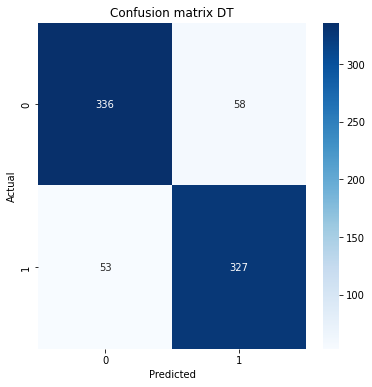

In [15]:
print_conf(Y_test, y_pred_dt, [0, 1], title="Confusion matrix DT")

# 5. Model Logistic Regression

In [16]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)
y_pred_lr = lr.predict(X_test)

In [17]:
accuracy_lr = round(accuracy_score(Y_test, y_pred_lr)*100,4)
precision_lr = round(precision_score(Y_test, y_pred_lr)*100,4)
recall_lr = round(recall_score(Y_test, y_pred_lr)*100,4)
f1_lr = round(f1_score(Y_test, y_pred_lr)*100,4)
print("Accuracy :",accuracy_lr)
print("Precision :",precision_lr)
print("Recall :",recall_lr)
print("F1 Score :",f1_lr)

Accuracy : 89.5349
Precision : 87.6574
Recall : 91.5789
F1 Score : 89.5753


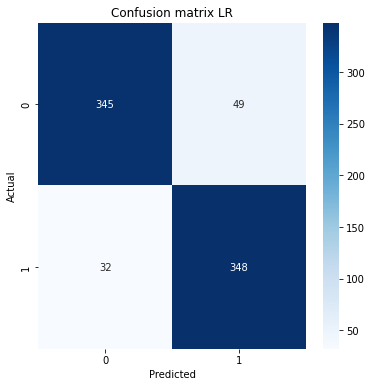

In [18]:
print_conf(Y_test, y_pred_lr, [0, 1], title="Confusion matrix LR")

# 6. Model Naive Bayes

In [19]:
nb = BernoulliNB()
nb.fit(X_train, Y_train)
y_pred_nb = nb.predict(X_test)

In [20]:
accuracy_nb = round(accuracy_score(Y_test, y_pred_nb)*100,4)
precision_nb = round(precision_score(Y_test, y_pred_nb)*100,4)
recall_nb = round(recall_score(Y_test, y_pred_nb)*100,4)
f1_nb = round(f1_score(Y_test, y_pred_nb)*100,4)
print("Accuracy :",accuracy_nb)
print("Precision :",precision_nb)
print("Recall :",recall_nb)
print("F1 Score :",f1_nb)

Accuracy : 92.3773
Precision : 89.8263
Recall : 95.2632
F1 Score : 92.4649


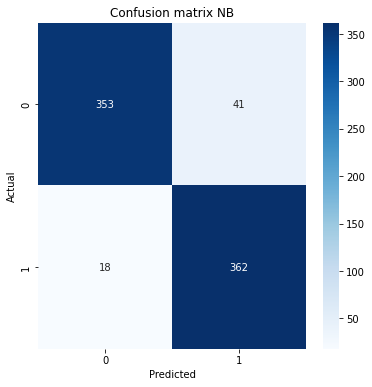

In [21]:
print_conf(Y_test, y_pred_nb, [0, 1], title="Confusion matrix NB")

# 7. Model SVM

In [22]:
svc = SVC()
svc.fit(X_train, Y_train)
y_pred_svc = svc.predict(X_test)

In [23]:
accuracy_svc = round(accuracy_score(Y_test, y_pred_svc)*100,4)
precision_svc = round(precision_score(Y_test, y_pred_svc)*100,4)
recall_svc = round(recall_score(Y_test, y_pred_svc)*100,4)
f1_svc = round(f1_score(Y_test, y_pred_svc)*100,4)
print("Accuracy :",accuracy_svc)
print("Precision :",precision_svc)
print("Recall :",recall_svc)
print("F1 Score :",f1_svc)

Accuracy : 93.0233
Precision : 88.6256
Recall : 98.4211
F1 Score : 93.2668


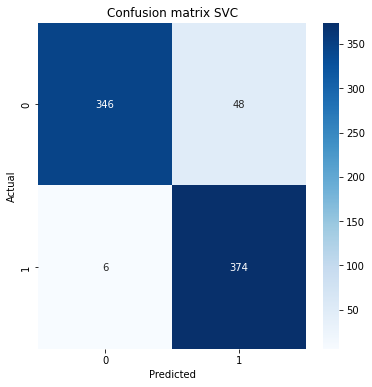

In [24]:
print_conf(Y_test, y_pred_svc, [0, 1], title="Confusion matrix SVC")

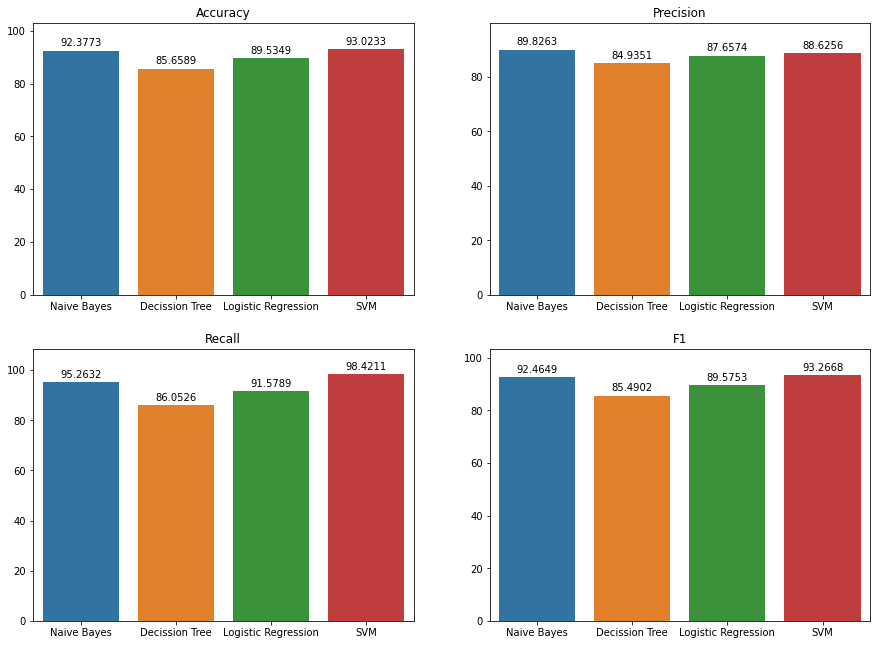

In [25]:
model_name = ["Naive Bayes", "Decission Tree", "Logistic Regression", "SVM"]
acc_pred = [accuracy_nb, accuracy_dt, accuracy_lr, accuracy_svc]
precision_pred = [precision_nb, precision_dt, precision_lr, precision_svc]
recall_pred = [recall_nb, recall_dt, recall_lr, recall_svc]
f1_pred = [f1_nb, f1_dt, f1_lr, f1_svc]
fig, ax = plt.subplots(2,2, figsize=(15,11))

# ------------------- Accuracy ------------------------

axes = sns.barplot(x=model_name, y=acc_pred, ax=ax[0,0])
for i in range(len(model_name)):
  axes.text(i, acc_pred[i]+3, acc_pred[i], 
           horizontalalignment='center', verticalalignment='center')
axes.set_ylim([0,max(acc_pred)+10])
axes.set_title("Accuracy")

# ------------------- Precission ------------------------

axes = sns.barplot(x=model_name, y=precision_pred, ax=ax[0,1])
for i in range(len(model_name)):
  axes.text(i, precision_pred[i]+3, precision_pred[i], 
           horizontalalignment='center', verticalalignment='center')
axes.set_ylim([0,max(precision_pred)+10])
axes.set_title("Precision")

# ------------------- Recall ------------------------

axes = sns.barplot(x=model_name, y=recall_pred, ax=ax[1,0])
for i in range(len(model_name)):
  axes.text(i, recall_pred[i]+3, recall_pred[i], 
           horizontalalignment='center', verticalalignment='center')
axes.set_ylim([0,max(recall_pred)+10])
axes.set_title("Recall")

# ---------------------- F1 --------------------------

axes = sns.barplot(x=model_name, y=f1_pred, ax=ax[1,1])
for i in range(len(model_name)):
  axes.text(i, f1_pred[i]+3, f1_pred[i], 
           horizontalalignment='center', verticalalignment='center')
axes.set_ylim([0,max(f1_pred)+10])
axes.set_title("F1")

plt.show()

In [26]:
import joblib

joblib.dump(svc, 'model_svc.joblib')
joblib.dump(tfidf_vectorizer, 'TF-IDF Vectorizer.joblib')

['TF-IDF Vectorizer.joblib']

In [27]:
saved_model = joblib.load('model_svc.joblib') 
saved_tfidf = joblib.load('TF-IDF Vectorizer.joblib')

In [30]:
tweets = ['anjing babi']
vectorized_tweets = saved_tfidf.transform(tweets).toarray()
input_prediction = saved_model.predict(vectorized_tweets)

In [31]:
input_prediction

array([1])